<a href="https://colab.research.google.com/github/ajithpious/Colab-Notebooks/blob/main/TurnerIceni_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Works/Data/TurnerIceni/data/m-has-2-131-2019_export.csv',delimiter='\t',header=None)

In [ ]:
df.shape

(2622279, 16)

In [ ]:
# loading the alarms data
df_alarms = pd.read_csv('/content/drive/MyDrive/Works/Data/TurnerIceni/data/alarm_events/alarm_events_m-has-2-131-2019.csv',header=0)
df_alarms.head(5)

,id,hostname,alarm_logic_id,alarm_type,logic_obj_stored,block_trigger_values,severity,status,assigned_to_uid,resolved_by_uid,unacknowledged_count,resolution_catagory,archived_flag,created_on,resolved_on,time_to_resolve
0,2566,m-has-2-131-2019,21234,1,"{""logic_blocks"":[{""block_id"":""C740"",""class_name"":""ThresholdBlock"",""sensor_to_check"":""vib_frame_accel"",""threshold"":12,""period_seconds"":1,""period_units"":""Days"",""params"":{""operator"":"">"",""min"":0,""max"":600}}],""logic_rule"":""C740""}",NaN,2,2,121,121,13,43,1,2023-01-12 23:40:30,2023-01-16 15:06:29,NaN
1,2567,m-has-2-131-2019,21236,1,"{""logic_blocks"": [{""block_id"": ""B003"",""class_name"": ""ThresholdBlock"",""sensor_to_check"": ""vib_shaft_accel"",""threshold"": 12,""period_seconds"": 1,""period_units"": ""days"",""params"": {""operator"": "">"",""min"": 0.00,""max"": 450.00}}],""logic_rule"": ""B003""}",NaN,2,2,121,121,100,43,1,2023-01-12 23:40:33,2023-01-16 15:06:37,NaN
2,2652,m-has-2-131-2019,21234,1,"{""logic_blocks"":[{""block_id"":""C740"",""class_name"":""ThresholdBlock"",""sensor_to_check"":""vib_frame_accel"",""threshold"":12,""period_seconds"":1,""period_units"":""Days"",""params"":{""operator"":"">"",""min"":0,""max"":600}}],""logic_rule"":""C740""}",NaN,2,2,121,121,13,40,1,2023-01-18 00:50:45,2023-01-26 08:35:08,NaN
3,2653,m-has-2-131-2019,21236,1,"{""logic_blocks"": [{""block_id"": ""B003"",""class_name"": ""ThresholdBlock"",""sensor_to_check"": ""vib_shaft_accel"",""threshold"": 12,""period_seconds"": 1,""period_units"": ""days"",""params"": {""operator"": "">"",""min"": 0.00,""max"": 450.00}}],""logic_rule"": ""B003""}",NaN,2,2,121,121,100,40,1,2023-01-18 00:50:48,2023-01-26 08:35:19,NaN
4,2719,m-has-2-131-2019,21234,1,"{""logic_blocks"":[{""block_id"":""C740"",""class_name"":""ThresholdBlock"",""sensor_to_check"":""vib_frame_accel"",""threshold"":12,""period_seconds"":1,""period_units"":""Days"",""params"":{""operator"":"">"",""min"":0,""max"":600}}],""logic_rule"":""C740""}",NaN,2,2,151,151,13,41,1,2023-01-29 10:11:52,2023-01-29 10:59:02,NaN


In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3539,1645986279023,1,1,m-has-2-131-2019,Earthmill,Hodgson-Hutton Hall,Hodgson - Hutton Hall,wind,windturbine,eseries,1,windsync,scada_ws_last_brake_torque,931.837,2022-02-27 18:24:39.558765
1,3540,1645986279023,1,1,m-has-2-131-2019,Earthmill,Hodgson-Hutton Hall,Hodgson - Hutton Hall,wind,windturbine,eseries,1,windsync,prox_hub_min_prox,4.62,2022-02-27 18:24:39.5623
2,3541,1645986279023,1,1,m-has-2-131-2019,Earthmill,Hodgson-Hutton Hall,Hodgson - Hutton Hall,wind,windturbine,eseries,1,windsync,prox_hub_proximity,5.94,2022-02-27 18:24:39.566039


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_rows', None)

In [ ]:
# params = np.array(df.tail(500).iloc[-22:,[13]]).flatten().tolist()

In [ ]:
# params

In [ ]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3539,1645986279023,1,1,m-has-2-131-2019,Earthmill,Hodgson-Hutton Hall,Hodgson - Hutton Hall,wind,windturbine,eseries,1,windsync,scada_ws_last_brake_torque,931.837,2022-02-27 18:24:39.558765
1,3540,1645986279023,1,1,m-has-2-131-2019,Earthmill,Hodgson-Hutton Hall,Hodgson - Hutton Hall,wind,windturbine,eseries,1,windsync,prox_hub_min_prox,4.62,2022-02-27 18:24:39.5623


In [ ]:
df_grp = df.groupby(1).agg({4:'first',13:','.join,14:','.join,15:'first'})
df_grp = df_grp.reset_index()

In [ ]:
df_grp.shape

(111198, 5)

In [ ]:
df_grp.head(3)

,1,4,13,14,15
0,1645986279023,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.62,5.94,0.0,150.1,194.24,3.8,-14.5,527.8,1534.0,3.7,1645986279023,293.56,2.0,2022-01-29T10:34:13+00:00,1,2.26,6.87,1501.0,0,40.0,0,Generating",2022-02-27 18:24:39.558765
1,1645986579188,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.61,5.94,0.0,150.0,198.66,4.3,-14.4,600.5,1534.0,4.1,1645986579188,308.24,6.1,2022-01-29T10:34:13+00:00,1,2.25,6.86,1499.5,0,40.1,0,Generating",2022-02-27 18:29:39.667005
2,1645986879324,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.63,5.95,0.0,149.8,195.42,3.7,-13.2,527.2,1534.0,3.8,1645986879324,297.88,2.1,2022-01-29T10:34:13+00:00,1,2.24,6.87,1498.3,0,40.3,0,Generating",2022-02-27 18:34:39.784117


In [ ]:
params = df_grp.iloc[-1,2].split(',')

In [ ]:
for label in params:
  def tra(labels,values):
    label_ls=labels.split(',')
    value_ls = values.split(',')

    for index,value in enumerate(label_ls):
      if(value == label and (label == 'scada_ws_turbine_status' or label == 'scada_ws_last_hispeed_braking_event')):
        return value_ls[index]
      if(value == label and label!='scada_ws_turbine_status'):
        return float(value_ls[index])

  df_grp[label] = df_grp.apply(lambda row:tra(row[13],row[14]),axis=1)

In [ ]:
df_grp.tail(3)

,1,4,13,14,15,scada_ws_last_brake_rpm,scada_ws_rotor_speed,scada_ws_wind_speed,vib_frame_accel,scada_ws_kvar,prox_hub_min_prox,scada_ws_gearbox_oil_temp,scada_ws_alarm_summation,scada_ws_turbine_status,scada_ws_shutdown_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_last_hispeed_braking_event,prox_hub_diff_prox,scada_ws_last_brake_torque,scada_ws_kw,scada_ws_yaw_turn_counter,vib_gearbox_accel,vib_shaft_accel,scada_ws_wind_speed_average,prox_hub_proximity,scada_ws_manual_mode_active
111195,1688977267535,m-has-2-131-2019,"scada_ws_last_brake_rpm,scada_ws_rotor_speed,scada_ws_wind_speed,vib_frame_accel,scada_ws_kvar,prox_hub_min_prox,scada_ws_gearbox_oil_temp,scada_ws_alarm_summation,scada_ws_turbine_status,scada_ws_shutdown_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_last_hispeed_braking_event,prox_hub_diff_prox,scada_ws_last_brake_torque,scada_ws_kw,scada_ws_yaw_turn_counter,vib_gearbox_accel...","0.0,150.1,5.4,269.92,-16.8,4.24,48.3,1,Generating,0,6.48,1500.8,2023-07-09T09:59:41+00:00,2.24,0.0,17.6,4.0,605.93,238.64,5.4,5.51,0",2023-07-10 08:21:08.25645,0.0,150.1,5.4,269.92,-16.8,4.24,48.3,1.0,Generating,0.0,6.48,1500.8,2023-07-09T09:59:41+00:00,2.24,0.0,17.6,4.0,605.93,238.64,5.4,5.51,0.0
111196,1688977567612,m-has-2-131-2019,"scada_ws_last_brake_rpm,scada_ws_rotor_speed,scada_ws_wind_speed,vib_frame_accel,scada_ws_kvar,prox_hub_min_prox,scada_ws_gearbox_oil_temp,scada_ws_alarm_summation,scada_ws_turbine_status,scada_ws_shutdown_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_last_hispeed_braking_event,prox_hub_diff_prox,scada_ws_last_brake_torque,scada_ws_kw,scada_ws_yaw_turn_counter,vib_gearbox_accel...","0.0,150.2,5.6,257.06,-16.4,4.22,48.7,1,Generating,0,6.46,1502.2,2023-07-09T09:59:41+00:00,2.23,0.0,19.2,4.0,619.41,226.22,5.6,5.5,0",2023-07-10 08:26:08.318473,0.0,150.2,5.6,257.06,-16.4,4.22,48.7,1.0,Generating,0.0,6.46,1502.2,2023-07-09T09:59:41+00:00,2.23,0.0,19.2,4.0,619.41,226.22,5.6,5.50,0.0
111197,1688977867756,m-has-2-131-2019,"scada_ws_last_brake_rpm,scada_ws_rotor_speed,scada_ws_wind_speed,vib_frame_accel,scada_ws_kvar,prox_hub_min_prox,scada_ws_gearbox_oil_temp,scada_ws_alarm_summation,scada_ws_turbine_status,scada_ws_shutdown_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_last_hispeed_braking_event,prox_hub_diff_prox,scada_ws_last_brake_torque,scada_ws_kw,scada_ws_yaw_turn_counter,vib_gearbox_accel...","0.0,150.3,4.6,248.39,-16.3,4.23,49.0,1,Generating,0,6.48,1502.9,2023-07-09T09:59:41+00:00,2.25,0.0,10.2,4.0,556.61,226.1,4.8,5.51,0",2023-07-10 08:31:08.381047,0.0,150.3,4.6,248.39,-16.3,4.23,49.0,1.0,Generating,0.0,6.48,1502.9,2023-07-09T09:59:41+00:00,2.25,0.0,10.2,4.0,556.61,226.10,4.8,5.51,0.0


In [ ]:
data = df_grp.rename(columns = {1:'time',4:'box_id',13:'labels',14:'values'})

In [ ]:
data.shape

(111198, 27)

In [ ]:
data.head(4)

,time,box_id,labels,values,15,scada_ws_last_brake_rpm,scada_ws_rotor_speed,scada_ws_wind_speed,vib_frame_accel,scada_ws_kvar,prox_hub_min_prox,scada_ws_gearbox_oil_temp,scada_ws_alarm_summation,scada_ws_turbine_status,scada_ws_shutdown_summation,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_last_hispeed_braking_event,prox_hub_diff_prox,scada_ws_last_brake_torque,scada_ws_kw,scada_ws_yaw_turn_counter,vib_gearbox_accel,vib_shaft_accel,scada_ws_wind_speed_average,prox_hub_proximity,scada_ws_manual_mode_active
0,1645986279023,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.62,5.94,0.0,150.1,194.24,3.8,-14.5,527.8,1534.0,3.7,1645986279023,293.56,2.0,2022-01-29T10:34:13+00:00,1,2.26,6.87,1501.0,0,40.0,0,Generating",2022-02-27 18:24:39.558765,1534.0,150.1,3.8,293.56,-14.5,4.62,40.0,1.0,Generating,0.0,6.87,1501.0,2022-01-29T10:34:13+00:00,2.26,931.837,2.0,0.0,527.8,194.24,3.7,5.94,0.0
1,1645986579188,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.61,5.94,0.0,150.0,198.66,4.3,-14.4,600.5,1534.0,4.1,1645986579188,308.24,6.1,2022-01-29T10:34:13+00:00,1,2.25,6.86,1499.5,0,40.1,0,Generating",2022-02-27 18:29:39.667005,1534.0,150.0,4.3,308.24,-14.4,4.61,40.1,1.0,Generating,0.0,6.86,1499.5,2022-01-29T10:34:13+00:00,2.25,931.837,6.1,0.0,600.5,198.66,4.1,5.94,0.0
2,1645986879324,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.63,5.95,0.0,149.8,195.42,3.7,-13.2,527.2,1534.0,3.8,1645986879324,297.88,2.1,2022-01-29T10:34:13+00:00,1,2.24,6.87,1498.3,0,40.3,0,Generating",2022-02-27 18:34:39.784117,1534.0,149.8,3.7,297.88,-13.2,4.63,40.3,1.0,Generating,0.0,6.87,1498.3,2022-01-29T10:34:13+00:00,2.24,931.837,2.1,0.0,527.2,195.42,3.8,5.95,0.0
3,1645987179443,m-has-2-131-2019,"scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,...","931.837,4.62,5.95,0.0,149.6,183.39,3.6,-19.2,415.0,1534.0,3.6,1645987179443,287.54,0.6,2022-01-29T10:34:13+00:00,1,2.26,6.88,1495.9,0,40.2,0,Freewheeling",2022-02-27 18:39:39.934189,1534.0,149.6,3.6,287.54,-19.2,4.62,40.2,1.0,Freewheeling,0.0,6.88,1495.9,2022-01-29T10:34:13+00:00,2.26,931.837,0.6,0.0,415.0,183.39,3.6,5.95,0.0


In [ ]:
from datetime import datetime
data['time_s'] = data['time'].map(lambda x:datetime.fromtimestamp(x//1000))

In [ ]:
datetime.fromtimestamp(1688133677)

datetime.datetime(2023, 6, 30, 14, 1, 17)

In [ ]:
data.head(5)

In [ ]:
# data.to_csv('/content/drive/MyDrive/Data/TurnerIceni/data/data.csv')

In [ ]:
columns=['scada_ws_gearbox_oil_temp',
                'scada_ws_last_brake_torque',
                           'vib_frame_accel',
                   'scada_ws_turbine_status',
                             'scada_ws_kvar',
               'scada_ws_wind_speed_average',
               'scada_ws_manual_mode_active',
                   'scada_ws_last_brake_rpm',
                 'scada_ws_yaw_turn_counter',
               'scada_ws_shutdown_summation',
                               'scada_ws_kw',
                         'prox_hub_min_prox',
                         'vib_gearbox_accel',
                      'scada_ws_rotor_speed',
                        'prox_hub_diff_prox',
       'scada_ws_last_hispeed_braking_event',
                  'scada_ws_alarm_summation',
                         'prox_hub_max_prox',
                           'vib_shaft_accel',
                  'scada_ws_generator_speed',
                       'scada_ws_wind_speed',
                        'prox_hub_proximity',
                                    'time_s']
features = ['scada_ws_gearbox_oil_temp',
                'scada_ws_last_brake_torque',
                           'vib_frame_accel',
                   'scada_ws_turbine_status',
                             'scada_ws_kvar',
               'scada_ws_wind_speed_average',
               'scada_ws_manual_mode_active',
                   'scada_ws_last_brake_rpm',
                 'scada_ws_yaw_turn_counter',
               'scada_ws_shutdown_summation',
                               'scada_ws_kw',
                         'prox_hub_min_prox',
                         'vib_gearbox_accel',
                      'scada_ws_rotor_speed',
                        'prox_hub_diff_prox',
       'scada_ws_last_hispeed_braking_event',
                  'scada_ws_alarm_summation',
                         'prox_hub_max_prox',
                           'vib_shaft_accel',
                  'scada_ws_generator_speed',
                       'scada_ws_wind_speed',
                        'prox_hub_proximity','time_s']
cont_features = ['scada_ws_gearbox_oil_temp',
                'scada_ws_last_brake_torque',
                           'vib_frame_accel',

                             'scada_ws_kvar',
               'scada_ws_wind_speed_average',
               'scada_ws_manual_mode_active',
                   'scada_ws_last_brake_rpm',
                 'scada_ws_yaw_turn_counter',
               'scada_ws_shutdown_summation',
                               'scada_ws_kw',
                         'prox_hub_min_prox',
                         'vib_gearbox_accel',
                      'scada_ws_rotor_speed',
                        'prox_hub_diff_prox',
                  'scada_ws_alarm_summation',
                         'prox_hub_max_prox',
                           'vib_shaft_accel',
                  'scada_ws_generator_speed',
                       'scada_ws_wind_speed',
                        'prox_hub_proximity','time_s']
alarm_cols = [ 'hostname','alarm_type',
       'block_trigger_values', 'severity','resolution_catagory','created_on']

In [ ]:
data.shape

(111198, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111198 entries, 0 to 111197
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   time                                 111198 non-null  int64         
 1   box_id                               111198 non-null  object        
 2   labels                               111198 non-null  object        
 3   values                               111198 non-null  object        
 4   15                                   111198 non-null  object        
 5   scada_ws_last_brake_rpm              111198 non-null  float64       
 6   scada_ws_rotor_speed                 111198 non-null  float64       
 7   scada_ws_wind_speed                  111198 non-null  float64       
 8   vib_frame_accel                      111198 non-null  float64       
 9   scada_ws_kvar                        111198 non-null  float64       
 

In [ ]:
data_download = data[cont_features].drop('time_s',axis=1)

In [ ]:
data_download.to_csv('/content/drive/MyDrive/Works/TurnerIceni/ML/DATA/data_131.txt',sep=',',header=None,index=None,)

In [ ]:
data_train = data_download.iloc[:50000,:]

In [ ]:
data_train.to_csv('/content/drive/MyDrive/Works/TurnerIceni/ML/DATA/data_131_train.txt',sep=',',header=None,index=None,)

In [ ]:
data_test = data_download.iloc[50000:,:]

In [ ]:
data_test.shape

(61198, 20)

In [ ]:
data_test.to_csv('/content/drive/MyDrive/Works/TurnerIceni/ML/DATA/data_131_test.txt',sep=',',header=None,index=None,)

In [ ]:
pd.DataFrame(np.ones((61198,1))).to_csv('/content/drive/MyDrive/Works/TurnerIceni/ML/DATA/data_131_labels.txt',sep=',',header=None,index=None,)

In [ ]:
test_labels.shape

(61198, 1)

Mounted at /content/drive


#EDA

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

In [ ]:
data_v = data[['prox_hub_min_prox','vib_shaft_accel','vib_frame_accel','scada_ws_yaw_turn_counter','vib_gearbox_accel','scada_ws_wind_speed','scada_ws_kw','prox_hub_proximity','prox_hub_max_prox','scada_ws_gearbox_oil_temp','prox_hub_diff_prox','scada_ws_alarm_summation','scada_ws_last_brake_torque','scada_ws_shutdown_summation','scada_ws_manual_mode_active','scada_ws_last_brake_rpm','scada_ws_rotor_speed','scada_ws_last_hispeed_braking_event','scada_ws_wind_speed_average','scada_ws_kvar','scada_ws_generator_speed']]
data_v.isnull().sum()

prox_hub_min_prox                      0
vib_shaft_accel                        0
vib_frame_accel                        0
scada_ws_yaw_turn_counter              0
vib_gearbox_accel                      0
scada_ws_wind_speed                    0
scada_ws_kw                            0
prox_hub_proximity                     0
prox_hub_max_prox                      0
scada_ws_gearbox_oil_temp              0
prox_hub_diff_prox                     0
scada_ws_alarm_summation               0
scada_ws_last_brake_torque             0
scada_ws_shutdown_summation            0
scada_ws_manual_mode_active            0
scada_ws_last_brake_rpm                0
scada_ws_rotor_speed                   0
scada_ws_last_hispeed_braking_event    0
scada_ws_wind_speed_average            0
scada_ws_kvar                          0
scada_ws_generator_speed               0
dtype: int64

In [ ]:
data.iloc[1,2]

'scada_ws_last_brake_torque,prox_hub_min_prox,prox_hub_proximity,scada_ws_yaw_turn_counter,scada_ws_rotor_speed,vib_shaft_accel,scada_ws_wind_speed,scada_ws_kvar,vib_gearbox_accel,scada_ws_last_brake_rpm,scada_ws_wind_speed_average,our_timestamp,vib_frame_accel,scada_ws_kw,scada_ws_last_hispeed_braking_event,scada_ws_alarm_summation,prox_hub_diff_prox,prox_hub_max_prox,scada_ws_generator_speed,scada_ws_manual_mode_active,scada_ws_gearbox_oil_temp,scada_ws_shutdown_summation,scada_ws_turbine_status'

In [ ]:
fig = figure(width=800, height=400)
fig.circle(data['time_s'],data['vib_frame_accel'])
show(fig)

In [ ]:
df_alarms.columns

Index(['id', 'hostname', 'alarm_logic_id', 'alarm_type', 'logic_obj_stored',
       'block_trigger_values', 'severity', 'status', 'assigned_to_uid',
       'resolved_by_uid', 'unacknowledged_count', 'resolution_catagory',
       'archived_flag', 'created_on', 'resolved_on', 'time_to_resolve'],
      dtype='object')

In [ ]:
df_alarms.head(5)

,id,hostname,alarm_logic_id,alarm_type,logic_obj_stored,block_trigger_values,severity,status,assigned_to_uid,resolved_by_uid,unacknowledged_count,resolution_catagory,archived_flag,created_on,resolved_on,time_to_resolve
0,2566,m-has-2-131-2019,21234,1,"{""logic_blocks"":[{""block_id"":""C740"",""class_name"":""ThresholdBlock"",""sensor_to_check"":""vib_frame_accel"",""threshold"":12,""period_seconds"":1,""period_units"":""Days"",""params"":{""operator"":"">"",""min"":0,""max"":600}}],""logic_rule"":""C740""}",NaN,2,2,121,121,13,43,1,2023-01-12 23:40:30,2023-01-16 15:06:29,NaN
1,2567,m-has-2-131-2019,21236,1,"{""logic_blocks"": [{""block_id"": ""B003"",""class_name"": ""ThresholdBlock"",""sensor_to_check"": ""vib_shaft_accel"",""threshold"": 12,""period_seconds"": 1,""period_units"": ""days"",""params"": {""operator"": "">"",""min"": 0.00,""max"": 450.00}}],""logic_rule"": ""B003""}",NaN,2,2,121,121,100,43,1,2023-01-12 23:40:33,2023-01-16 15:06:37,NaN
2,2652,m-has-2-131-2019,21234,1,"{""logic_blocks"":[{""block_id"":""C740"",""class_name"":""ThresholdBlock"",""sensor_to_check"":""vib_frame_accel"",""threshold"":12,""period_seconds"":1,""period_units"":""Days"",""params"":{""operator"":"">"",""min"":0,""max"":600}}],""logic_rule"":""C740""}",NaN,2,2,121,121,13,40,1,2023-01-18 00:50:45,2023-01-26 08:35:08,NaN
3,2653,m-has-2-131-2019,21236,1,"{""logic_blocks"": [{""block_id"": ""B003"",""class_name"": ""ThresholdBlock"",""sensor_to_check"": ""vib_shaft_accel"",""threshold"": 12,""period_seconds"": 1,""period_units"": ""days"",""params"": {""operator"": "">"",""min"": 0.00,""max"": 450.00}}],""logic_rule"": ""B003""}",NaN,2,2,121,121,100,40,1,2023-01-18 00:50:48,2023-01-26 08:35:19,NaN
4,2719,m-has-2-131-2019,21234,1,"{""logic_blocks"":[{""block_id"":""C740"",""class_name"":""ThresholdBlock"",""sensor_to_check"":""vib_frame_accel"",""threshold"":12,""period_seconds"":1,""period_units"":""Days"",""params"":{""operator"":"">"",""min"":0,""max"":600}}],""logic_rule"":""C740""}",NaN,2,2,151,151,13,41,1,2023-01-29 10:11:52,2023-01-29 10:59:02,NaN


In [ ]:
pd.plotting.scatter_matrix(data[features],figsize=(60,30))

In [ ]:
data.columns

Index([                               'time',
                                    'box_id',
                                    'labels',
                                    'values',
                                          15,
                   'scada_ws_last_brake_rpm',
                      'scada_ws_rotor_speed',
                       'scada_ws_wind_speed',
                           'vib_frame_accel',
                             'scada_ws_kvar',
                         'prox_hub_min_prox',
                 'scada_ws_gearbox_oil_temp',
                  'scada_ws_alarm_summation',
                   'scada_ws_turbine_status',
               'scada_ws_shutdown_summation',
                         'prox_hub_max_prox',
                  'scada_ws_generator_speed',
       'scada_ws_last_hispeed_braking_event',
                        'prox_hub_diff_prox',
                'scada_ws_last_brake_torque',
                               'scada_ws_kw',
                 'scada_ws_yaw_tur

In [ ]:
# corelation matrix plot
corr = data[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-33-e773c6ea1351>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data[columns].corr()


,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,vib_frame_accel,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,vib_gearbox_accel,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,vib_shaft_accel,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
scada_ws_gearbox_oil_temp,1.000000,0.739407,-0.112731,0.999117,0.999793,0.999712,0.683951,0.999705,0.999712,0.999321,-0.074138,-0.007948,0.995127,-0.051467,0.999712,-0.128562,-0.112306,0.843356,0.999793,-0.140542
scada_ws_last_brake_torque,0.739407,1.000000,-0.063904,0.739620,0.740733,0.740383,0.994017,0.739271,0.740383,0.741729,0.041530,-0.006164,0.736245,-0.042471,0.740328,-0.016522,-0.062053,0.621074,0.740734,0.009278
vib_frame_accel,-0.112731,-0.063904,1.000000,-0.133530,-0.119394,-0.122585,-0.049818,-0.122606,-0.122586,-0.099830,-0.139152,0.521625,-0.073637,0.441048,-0.122661,0.426536,0.945212,0.129580,-0.119392,0.272824
scada_ws_kvar,0.999117,0.739620,-0.133530,1.000000,0.999651,0.999775,0.684323,0.999776,0.999775,0.997930,-0.055126,-0.042734,0.991255,-0.081234,0.999776,-0.148961,-0.139800,0.824470,0.999651,-0.147442
scada_ws_wind_speed_average,0.999793,0.740733,-0.119394,0.999651,1.000000,0.999981,0.685497,0.999973,0.999981,0.999114,-0.063323,-0.021300,0.993808,-0.064001,0.999980,-0.134702,-0.121644,0.835950,1.000000,-0.139987
scada_ws_manual_mode_active,0.999712,0.740383,-0.122585,0.999775,0.999981,1.000000,0.685103,0.999994,1.000000,0.998870,-0.062509,-0.025689,0.993401,-0.067164,1.000000,-0.137921,-0.125571,0.833913,0.999981,-0.142158
scada_ws_last_brake_rpm,0.683951,0.994017,-0.049818,0.684323,0.685497,0.685103,1.000000,0.683910,0.685104,0.686648,0.056815,-0.006847,0.681184,-0.039575,0.685058,0.000402,-0.048818,0.574286,0.685498,0.030641
scada_ws_yaw_turn_counter,0.999705,0.739271,-0.122606,0.999776,0.999973,0.999994,0.683910,1.000000,0.999994,0.998845,-0.062922,-0.026056,0.993367,-0.067400,0.999995,-0.138575,-0.125616,0.833772,0.999973,-0.142907
scada_ws_shutdown_summation,0.999712,0.740383,-0.122586,0.999775,0.999981,1.000000,0.685104,0.999994,1.000000,0.998870,-0.062503,-0.025692,0.993401,-0.067168,1.000000,-0.137921,-0.125573,0.833910,0.999981,-0.142155
scada_ws_kw,0.999321,0.741729,-0.099830,0.997930,0.999114,0.998870,0.686648,0.998845,0.998870,1.000000,-0.064515,0.002963,0.994564,-0.050534,0.998863,-0.119013,-0.098255,0.843978,0.999115,-0.128135


In [ ]:
data_v = data[cont_features]
data_v.dtypes

scada_ws_gearbox_oil_temp      float64
scada_ws_last_brake_torque     float64
vib_frame_accel                float64
scada_ws_kvar                  float64
scada_ws_wind_speed_average    float64
scada_ws_manual_mode_active    float64
scada_ws_last_brake_rpm        float64
scada_ws_yaw_turn_counter      float64
scada_ws_shutdown_summation    float64
scada_ws_kw                    float64
prox_hub_min_prox              float64
vib_gearbox_accel              float64
scada_ws_rotor_speed           float64
prox_hub_diff_prox             float64
scada_ws_alarm_summation       float64
prox_hub_max_prox              float64
vib_shaft_accel                float64
scada_ws_generator_speed       float64
scada_ws_wind_speed            float64
prox_hub_proximity             float64
dtype: object

In [ ]:
data.dtypes

In [ ]:
# fig = figure(width=800, height=400)
# fig.circle(data['time_s'],data_v[''])
# show(fig)

In [ ]:
data_v.describe()

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,vib_frame_accel,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,vib_gearbox_accel,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,vib_shaft_accel,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
count,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000,111198.000000
mean,-152.731657,109.902977,226.458426,-201.131263,-186.704282,-190.377723,188.819610,-189.709194,-190.376625,-177.779212,4.770533,474.472118,-96.630623,1.790944,-190.135857,6.561480,176.694797,747.400129,-186.663229,5.798117
std,461.962773,775.302322,153.921836,441.257607,447.328553,445.751068,887.066778,446.039088,445.751538,451.642217,0.575117,279.894009,489.017264,0.819320,445.854563,0.659594,99.664114,1014.823118,447.346097,0.483019
min,-1234.000000,-1234.000000,97.460000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,3.410000,87.820000,-1234.000000,0.070000,-1234.000000,3.620000,61.340000,-1234.000000,-1234.000000,3.550000
25%,29.800000,0.000000,119.830000,-23.600000,1.100000,0.000000,0.000000,-1.000000,0.000000,0.000000,4.420000,151.627500,0.000000,1.900000,0.000000,6.370000,86.610000,0.000000,1.200000,5.560000
50%,43.100000,0.000000,220.680000,-17.100000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,4.660000,571.850000,148.300000,2.230000,0.000000,6.710000,187.460000,1482.600000,3.300000,5.840000
75%,51.500000,0.000000,257.200000,0.000000,5.300000,0.000000,112.000000,2.000000,0.000000,15.600000,4.930000,722.030000,150.200000,2.260000,0.000000,6.980000,218.980000,1502.600000,5.400000,6.100000
max,70.600000,1387.130000,2193.350000,1.200000,24.800000,1.000000,1733.000000,8.000000,1.000000,104.200000,7.370000,1044.770000,152.500000,2.400000,1.000000,8.010000,1421.530000,1524.600000,24.700000,7.480000


#Moving Average

In [ ]:
data_alarms = df_alarms[alarm_cols]

In [ ]:
data.head(5)

In [ ]:
data_alarms['created_on'] = data_alarms['created_on'].map(lambda x:np.datetime64(x))

<ipython-input-26-a3aa7f52a45b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_alarms['created_on'] = data_alarms['created_on'].map(lambda x:np.datetime64(x))


In [ ]:
data_alarms.dtypes

##Simple Moving Average

In [ ]:
# Simple Moving Average
data_SMA = pd.DataFrame(data['time_s'])

In [ ]:
for index,fea in enumerate(cont_features):
  data_SMA[fea] = data_v[fea].rolling(2000).mean()

In [ ]:
data_SMA.dtypes

In [ ]:
data_alarms['created_on']

In [ ]:
fig = figure(width=1200, height=600,x_axis_type='datetime')
fig.circle(data_SMA['time_s'],data_SMA['vib_frame_accel'],color='black',legend_label='vib_frame_accel')
fig.circle(data_SMA['time_s'],data_SMA['vib_shaft_accel'],color='pink',legend_label='vib_shaft_accel')
# fig.circle(data_SMA['time_s'],data_SMA['vib_gearbox_accel'],color='orange',legend_label='vib_gearbox_accel')
fig.circle(data_alarms['created_on'],[250]*12,color ="red",legend_label='alarms',size=10)
fig.legend.location = "top_right"
show(fig)


In [ ]:
data_SMA['time_s'].head(5)

0   2022-02-27 18:24:39
1   2022-02-27 18:29:39
2   2022-02-27 18:34:39
3   2022-02-27 18:39:39
4   2022-02-27 18:44:39
Name: time_s, dtype: datetime64[ns]

##Cumulative Moving Average

In [ ]:
# Cumilative Moving Average
data_CMA = pd.DataFrame(data['time_s'])
for index,fea in enumerate(cont_features):
  data_CMA[fea] = data_v[fea].expanding().mean()

In [ ]:
fig = figure(width=1200, height=400,x_axis_type='datetime')
fig.circle(data_CMA['time_s'],data_CMA['vib_frame_accel'])
show(fig)

#Anomaly Detection

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure,show
output_notebook()

In [ ]:
data_ano = data[cont_features]

In [ ]:
fig = figure(width=1200, height=600,x_axis_type='datetime')
fig.circle(data_ano['time_s'],data_ano['vib_frame_accel'],color='black',legend_label='vib_frame_accel')
show(fig)

In [ ]:
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [ ]:
anomaly_data = data[cont_features].iloc[5000:10000,:]

In [ ]:
corr = pairwise_distances(anomaly_data,metric='correlation')

In [ ]:
data_SMA[cont_features].head(100)

In [ ]:
data.shape

(111198, 28)

In [ ]:
data_SMA.shape

(111198, 21)

##Using AutoEncoders

In [ ]:
import tensorflow as tf


In [ ]:
data_auto = data.iloc[:50000,:]

In [ ]:
data_auto = data_auto[cont_features]

In [ ]:
data_auto.describe()

,scada_ws_gearbox_oil_temp,scada_ws_last_brake_torque,vib_frame_accel,scada_ws_kvar,scada_ws_wind_speed_average,scada_ws_manual_mode_active,scada_ws_last_brake_rpm,scada_ws_yaw_turn_counter,scada_ws_shutdown_summation,scada_ws_kw,prox_hub_min_prox,vib_gearbox_accel,scada_ws_rotor_speed,prox_hub_diff_prox,scada_ws_alarm_summation,prox_hub_max_prox,vib_shaft_accel,scada_ws_generator_speed,scada_ws_wind_speed,prox_hub_proximity
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,42.395430,291.051901,199.879184,-16.442650,0.452668,-3.800720,368.513040,-3.177880,-3.799620,10.856718,4.654318,504.621106,108.52972,1.784730,-3.519820,6.439068,160.432756,1119.735418,0.501278,5.678330
std,71.771811,530.191967,65.104887,68.392278,68.671385,68.379357,662.480732,68.432397,68.379427,72.668074,0.524768,296.993960,95.59394,0.806731,68.396446,0.648625,61.761807,610.971970,68.674171,0.455169
min,-1234.000000,-1234.000000,98.740000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,-1234.000000,3.410000,87.820000,-1234.00000,0.100000,-1234.000000,3.620000,63.730000,-1234.000000,-1234.000000,3.550000
25%,39.100000,0.000000,123.310000,-18.900000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.350000,169.240000,87.50000,1.900000,0.000000,6.290000,87.900000,876.500000,2.200000,5.470000
50%,47.300000,0.000000,222.610000,-16.000000,3.800000,0.000000,0.000000,1.000000,0.000000,3.000000,4.550000,612.940000,149.90000,2.220000,0.000000,6.610000,184.750000,1499.500000,3.900000,5.740000
75%,54.300000,0.000000,249.410000,0.000000,5.800000,0.000000,0.000000,2.000000,0.000000,21.200000,4.810000,772.530000,150.30000,2.240000,1.000000,6.840000,209.920000,1503.400000,5.800000,5.960000
max,70.600000,1387.130000,504.070000,1.200000,17.500000,0.000000,1686.000000,8.000000,1.000000,100.300000,7.160000,1044.770000,152.20000,2.350000,1.000000,7.780000,495.730000,1522.300000,17.400000,7.260000


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

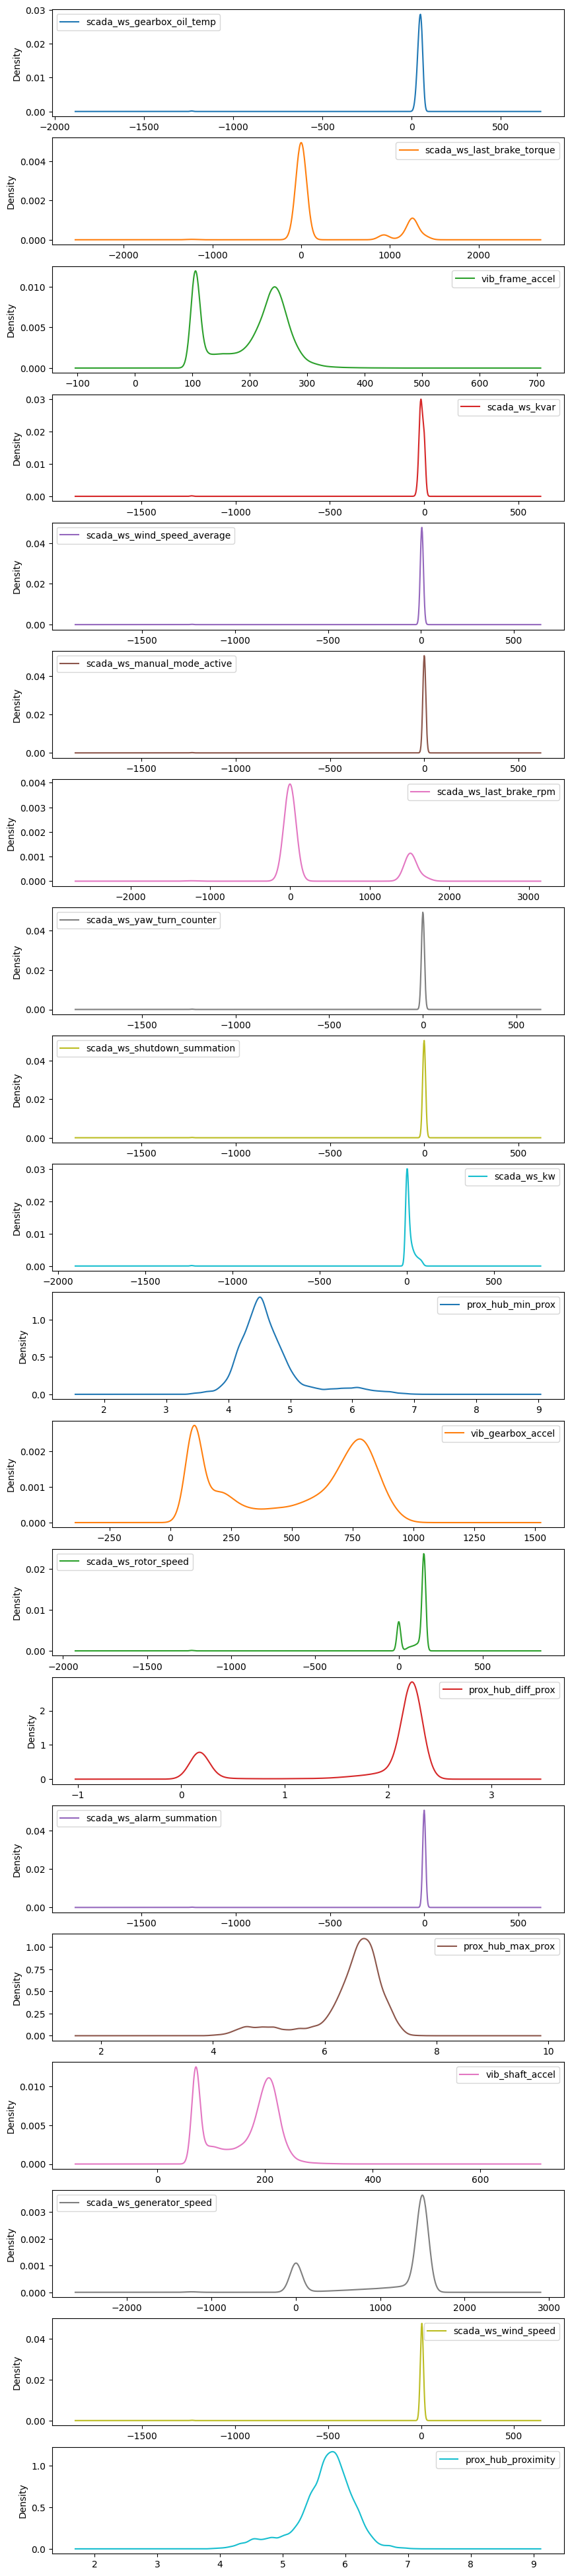

In [ ]:
data_auto.iloc[:,:-1].plot(kind='density',subplots=True,sharex=False,figsize=(10,50))

In [ ]:
data_auto.columns

Index(['scada_ws_gearbox_oil_temp', 'scada_ws_last_brake_torque',
       'vib_frame_accel', 'scada_ws_kvar', 'scada_ws_wind_speed_average',
       'scada_ws_manual_mode_active', 'scada_ws_last_brake_rpm',
       'scada_ws_yaw_turn_counter', 'scada_ws_shutdown_summation',
       'scada_ws_kw', 'prox_hub_min_prox', 'vib_gearbox_accel',
       'scada_ws_rotor_speed', 'prox_hub_diff_prox',
       'scada_ws_alarm_summation', 'prox_hub_max_prox', 'vib_shaft_accel',
       'scada_ws_generator_speed', 'scada_ws_wind_speed', 'prox_hub_proximity',
       'time_s'],
      dtype='object')

In [ ]:
data_auto['prox_hub_proximity'].value_counts()

<Axes: ylabel='Density'>

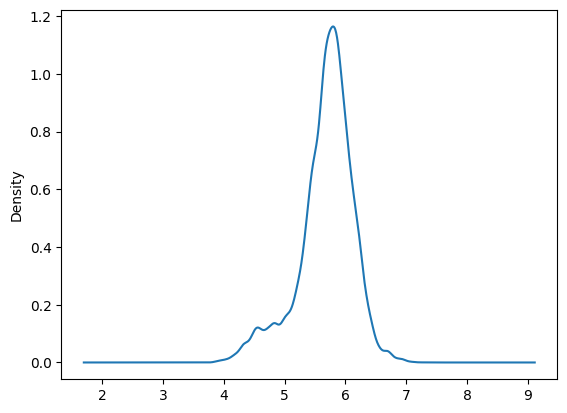

In [ ]:
data_auto['prox_hub_proximity'].plot(kind='density')

In [ ]:
columns = ['scada_ws_gearbox_oil_temp', 'scada_ws_last_brake_torque',
       'vib_frame_accel', 'scada_ws_kvar', 'scada_ws_wind_speed_average',
       'scada_ws_kw', 'prox_hub_min_prox', 'vib_gearbox_accel',
       'scada_ws_rotor_speed', 'prox_hub_diff_prox',
        'prox_hub_max_prox', 'vib_shaft_accel',
       'scada_ws_generator_speed', 'scada_ws_wind_speed', 'prox_hub_proximity',
       ]

In [ ]:
data_cols = data_auto[columns]

In [ ]:
# standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_cols),columns=columns)

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

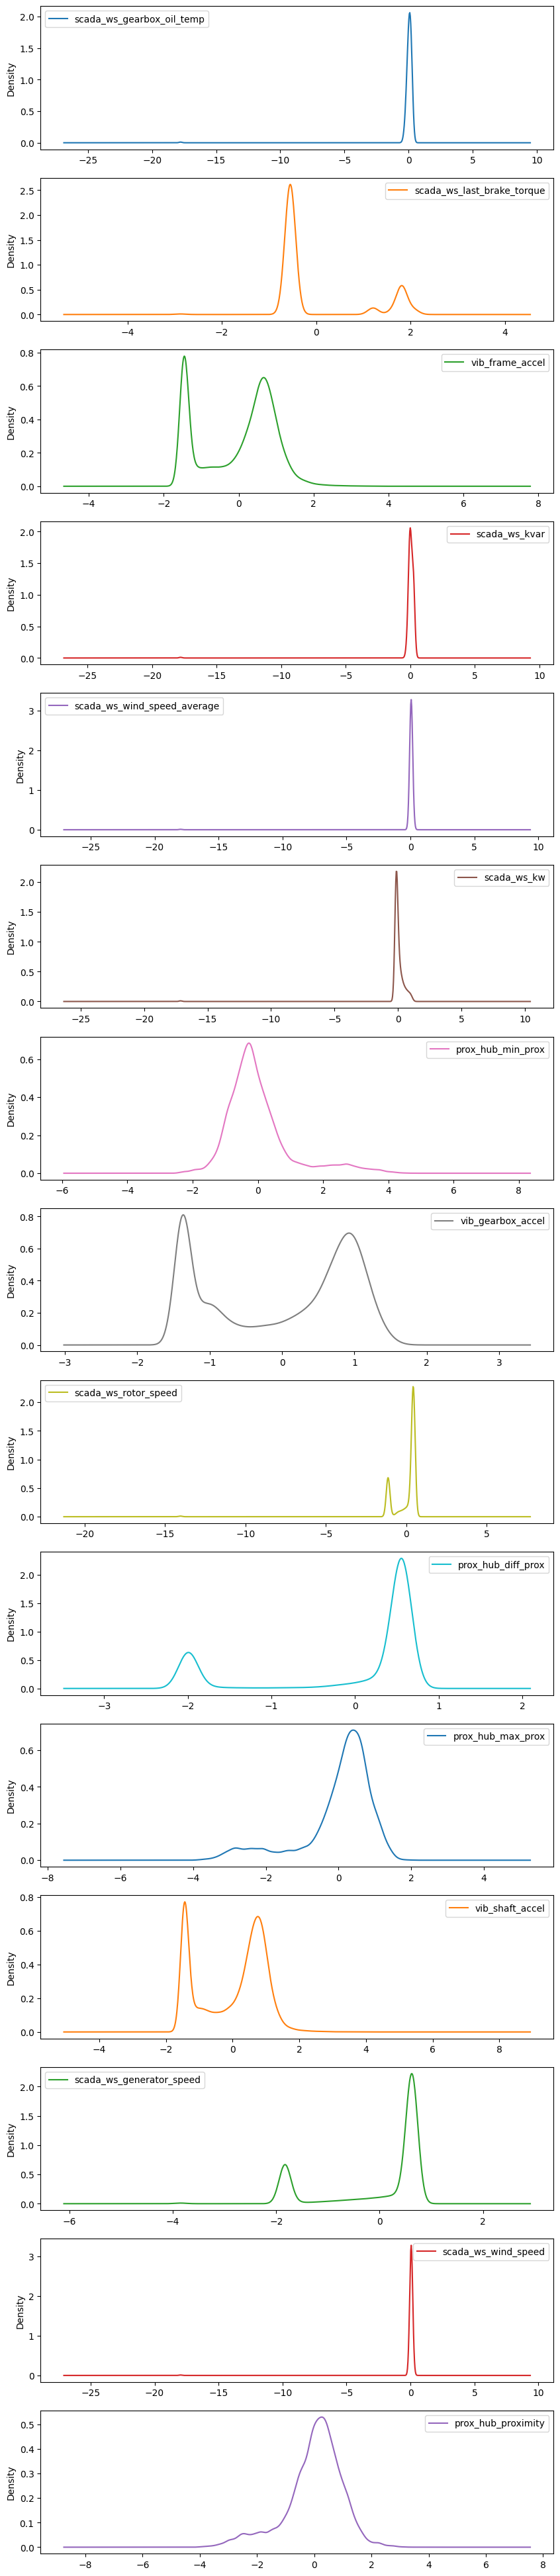

In [ ]:
data_scaled.plot(kind='density',subplots=True,sharex=False,figsize=(10,50))

In [ ]:
from tensorflow.keras.models import Model, Sequential

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(140, activation="sigmoid"))
model.compile(optimizer='adam', loss="mae")

In [ ]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


In [ ]:
num_features = len(columns)

In [ ]:
input_layer = Input(shape=(num_features,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation="relu")(encoded)
encoded = Dense(16, activation="relu")(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(num_features, activation='linear')(decoded)
autoencoder = Model(input_layer, decoded)

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_40 (Dense)            (None, 64)                1024      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 8)                 136       
                                                                 
 dense_44 (Dense)            (None, 16)                144       
                                                                 
 dense_45 (Dense)            (None, 32)                544 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
train_data = data_scaled[:35000]
test_data = data_scaled[35000:]

In [ ]:
autoencoder.fit(train_data, train_data, epochs=50, batch_size=300, shuffle=True,validation_data=(test_data, test_data))

Epoch 1/50
1094/1094 [==============================] - 10s 8ms/step - loss: 0.0502 - val_loss: 1.2830
Epoch 2/50
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0117 - val_loss: 1.2971
Epoch 3/50
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0097 - val_loss: 1.2985
Epoch 4/50
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0084 - val_loss: 1.2749
Epoch 5/50
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0079 - val_loss: 1.3025
Epoch 6/50
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0075 - val_loss: 1.3150
Epoch 7/50
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0071 - val_loss: 1.3344
Epoch 8/50
1094/1094 [==============================] - 5s 4ms/step - loss: 0.0061 - val_loss: 1.3855
Epoch 9/50
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0058 - val_loss: 1.4680
Epoch 10/50
1094/1094 [==============================] - 3s 3ms/step - loss: 0.00

In [ ]:
reconstructed_data = autoencoder.predict(test_data)

469/469 [==============================] - 1s 1ms/step


In [ ]:
reconstruction_errors = np.mean(np.square(test_data - reconstructed_data), axis=1)


In [ ]:
threshold = np.percentile(reconstruction_errors, 98)  # Adjust the percentile as needed
anomalies = np.where(reconstruction_errors > threshold)[0]
# print("Detected anomalies:", anomalies)
print(len(anomalies))

300


In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure,show
output_notebook()

In [ ]:
fig = figure(width=1200, height=600,x_axis_type='datetime')
fig.circle(data_auto['time_s'][35000:],test_data['vib_frame_accel'],color='black',legend_label='vib_frame_accel')
fig.circle(data_auto['time_s'][35000:].iloc[anomalies],test_data['vib_frame_accel'].iloc[anomalies],color='red',legend_label='anomaly')
fig.circle(data_auto['time_s'][35000:],test_data['vib_frame_accel']-8,color='black',legend_label='vib_frame_accel')

show(fig)

In [ ]:
data_auto['time_s'][35000:].iloc[[0,1,2]]

35000   2022-07-31 14:54:00
35001   2022-07-31 14:59:00
35002   2022-07-31 15:04:00
35003   2022-07-31 15:09:00
35004   2022-07-31 15:14:00
Name: time_s, dtype: datetime64[ns]

In [ ]:
data_auto['time_s'][35000:].iloc[[1,2,3]]

35001   2022-07-31 14:59:00
35002   2022-07-31 15:04:00
35003   2022-07-31 15:09:00
Name: time_s, dtype: datetime64[ns]

###using LSTM

In [ ]:
from tensorflow.keras.layers import LSTM,RepeatVector


In [ ]:
train_data = data_scaled[:35000]
test_data = data_scaled[35000:45500]


In [ ]:
train_data_seq = train_data.to_numpy().reshape((-1,350,15))
test_data_seq = test_data.to_numpy().reshape((-1,350,15))

In [ ]:
sequence_length = 350
# model
input_layer = Input(shape=(sequence_length, num_features))
encoded = LSTM(16, activation='relu')(input_layer)
decoded = RepeatVector(sequence_length)(encoded)
decoded = LSTM(num_features, activation='linear', return_sequences=True)(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
autoencoder.summary()

In [ ]:
autoencoder.fit(train_data_seq, train_data_seq, epochs=500, batch_size=32, shuffle=True, validation_data=(test_data_seq, test_data_seq))


In [ ]:
reconstructed_data = autoencoder.predict(test_data_seq)
# Calculate reconstruction error for anomaly detection
reconstruction_errors = np.mean(np.square(test_data_seq - reconstructed_data), axis=(1, 2))

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile as needed

# Identify anomalies
anomalies = np.where(reconstruction_errors > threshold)[0]

print("Detected anomalies:", anomalies)

1/1 [==============================] - 0s 116ms/step
Detected anomalies: [21 22]


#Analysis



In [ ]:
from bokeh.io import output_notebook
output_notebook()

In [ ]:
from bokeh.plotting import figure, show
fig = figure(width=800, height=400)
fig.circle(data['vib_frame_accel'].tolist(),data['vib_shaft_accel'].tolist(),size=2, color="navy", alpha=0.5)
show(fig)


In [ ]:
data['vib_frame_accel'].map(lambda x:float(x))

In [ ]:
from bokeh.plotting import figure, show

p = figure(width=400, height=400)

# add a circle renderer with a size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

# show the results
show(p)

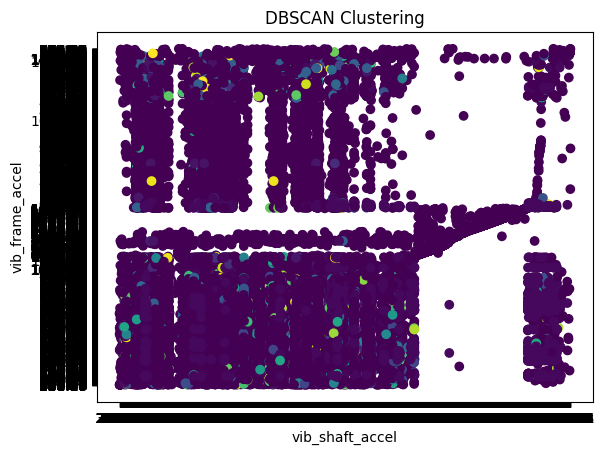

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data with three blobs in three dimensions
# X, y = make_blobs(n_samples=200, n_features=3, centers=3, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data[['vib_shaft_accel','vib_frame_accel']])

# # Plot the clusters
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(data['vib_shaft_accel'], data['vib_frame_accel'], c=labels)
ax.set_xlabel("vib_shaft_accel")
ax.set_ylabel("vib_frame_accel")
plt.title("DBSCAN Clustering")
plt.show()

In [ ]:
labels.shape

(91013,)

In [ ]:
labels

array([-1, -1, -1, ..., 10, 10, 10])

In [ ]:
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17